<a href="https://colab.research.google.com/github/EddyGiusepe/Cyber_Security_1/blob/main/CyberSecurity_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Cyber Security -- Kaggle</h2> 


**Data Scientist Jr.:**  Dr.Eddy Giusepe Chirinos Isidro


Neste Script reproduziremos e exploraremos ataques cibern√©ticos. Basicamente temos Dados onde no √∫ltimo m√™s, alguns eventos de SEGURAN√áA CIBERN√âTICA com dura√ß√µes e padr√µes diferentes foram registrados.


Nesse sentido, podemos derivar:

* Endere√ßo de IP de destino mais direcionado,
* A maioria das portas l√≥gicas atacadas,
* Tipo de ataque mais frequente/comum,
* Hora diferente do dia (odd (estranho), horas, dia ou noite),
* Encontrar um padr√£o.

Este Script est√° baseado nos seguintes links:

* [Cyber Security](https://www.kaggle.com/iamranjann/exploring-attacks-cybersec/notebook).
* [Cyber Security no YouTube](https://www.youtube.com/watch?v=7q8XQSUeUPc&list=PLlUZLZydkS79ctBEkAqeNj5k0RNvAvvD7&index=1).

## Importamos as nossas bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

## Carregamos nossos Dados de Cyber Security

In [2]:
df = pd.read_csv("/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/3_Data_Science_Augusto_Eddy/Attacks CyberSecurity Kaggle/Cybersecurity_attacks.csv")


In [3]:
df.shape

(178031, 11)

In [4]:
# Observamos que as nossas colunas s√£o:

df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [6]:
df.head(5)

Attack category   Attack subcategory  ...  .                   Time
0  Reconnaissance                 HTTP  ...  .  1421927414-1421927416
1        Exploits     Unix 'r' Service  ...  .  1421927415-1421927415
2        Exploits              Browser  ...  .  1421927416-1421927416
3        Exploits  Miscellaneous Batch  ...  .  1421927417-1421927417
4        Exploits           Cisco IOS   ...  .  1421927418-1421927418

[5 rows x 11 columns]

In [7]:
df.shape

(178031, 11)

In [8]:
# OBS: Seria importante limpar os Dados certinho. Por exemplo aqui observamos o atributo "Reconnaissance" v√°rias vezes.
df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

## An√°lise, limpeza e explora√ß√£o de nossos Dados

In [ ]:
# Na coluna "time" aplicamos o m√©todo --> split(), para separar em tempo de in√≠cio e tempo final

df[['Start time', 'Last time']] = df['Time'].str.split('-', expand=True)

df.sample(6)

Attack category Attack subcategory  ...  Start time   Last time
139194         Generic               IXIA  ...  1424252041  1424252041
47928         Exploits      Miscellaneous  ...  1424230235  1424230235
174362         Fuzzers                RIP  ...  1421928719  1421928719
57056              DoS      Miscellaneous  ...  1424230398  1424230398
21335              DoS               HTTP  ...  1424223193  1424223193
137722        Exploits      Miscellaneous  ...  1424251720  1424251720

[6 rows x 13 columns]

In [ ]:
# Percebemos que temos uma coluna com nome --> "."
# Vejamos nesta coluna se temos algum valor (num√©rico o categ√≥rico), assim:

df['.'].unique()


array(['.'], dtype=object)

In [ ]:
# Seguidamente eliminamos colunas que n√£o s√£o uteis para nossa an√°lise
# Dropamos colunas e fazemos uma c√≥pia na mem√≥ria do objeto

df = df.drop(['.', 'Time'], axis=1) 

df.sample(6)

Attack category Attack subcategory  ...  Start time   Last time
118021        Exploits      Miscellaneous  ...  1424247161  1424247220
8862          Exploits         Clientside  ...  1421931527  1421931531
8674           Fuzzers                BGP  ...  1421931441  1421931442
88998         Exploits               RTSP  ...  1424238233  1424238258
88177         Exploits         Clientside  ...  1424237946  1424237949
97755         Exploits      Miscellaneous  ...  1424242143  1424242200

[6 rows x 11 columns]

In [ ]:
df.shape

(178031, 11)

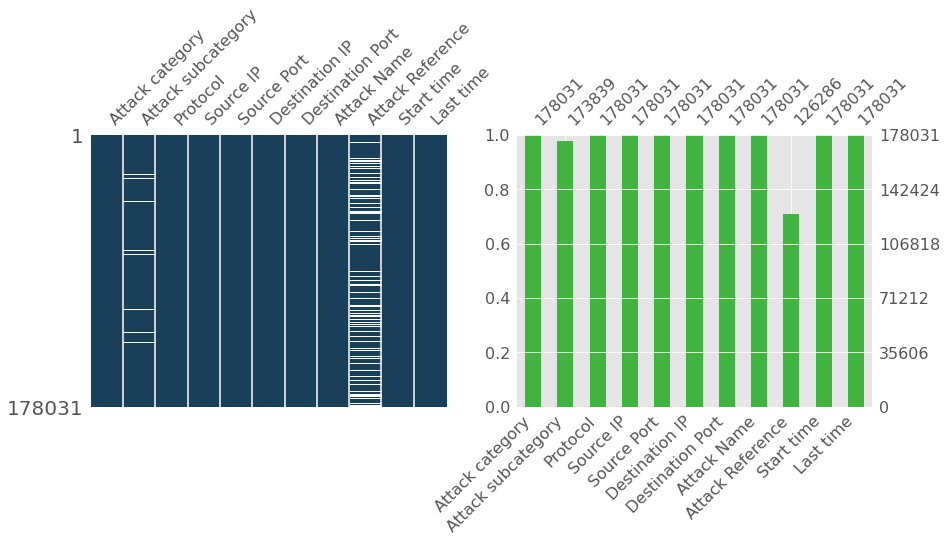

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [ ]:
# Vejamos os valores MISSING que temos em nossos Dados

df.isna().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [ ]:
# Tamb√©m

df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [ ]:
# Aqui vamos a preecher os valores MISSING com "Not Registered"

df["Attack subcategory"] = df["Attack subcategory"].fillna("Not Registered")

In [ ]:
# Visualizamos nossos Dados e verificamos a troca de NaN --> "Not Registered"

df.sample(100)

Attack category  ...   Last time
44619           Exploits  ...  1424229680
80547    Reconnaissance   ...  1424237342
74390           Exploits  ...  1424237237
143952          Analysis  ...  1424254094
83536    Reconnaissance   ...  1424237379
...                  ...  ...         ...
69700            Generic  ...  1424234674
127320          Exploits  ...  1424251581
135321          Exploits  ...  1424251667
7027      Reconnaissance  ...  1421930806
87560            Generic  ...  1424237677

[100 rows x 11 columns]

In [ ]:
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [ ]:
df.shape

(178031, 11)

In [ ]:
df[pd.isnull(df).any(axis=1)].shape

(51745, 11)

In [ ]:
# Vejamos quantas linhas duplicadas temos
# A seguir eliminaremos essas linhas duplicadas

df[df.duplicated()].shape # Temos 6 linhas duplicadas

(6, 11)

In [ ]:
print('Dimens√µes antes de descartar linhas duplicadas: ' + str(df.shape))
df = df.drop(df[df.duplicated()].index)
print('Dimens√µes ap√≥s eliminar linhas duplicadas: ' + str(df.shape))

Dimens√µes antes de descartar linhas duplicadas: (178031, 11)
Dimens√µes ap√≥s eliminar linhas duplicadas: (178025, 11)


In [ ]:
# Aqui podemos verificar qua n√£o temos linhas duplicadas

df[df.duplicated()]

Empty DataFrame
Columns: [Attack category, Attack subcategory, Protocol, Source IP, Source Port, Destination IP, Destination Port, Attack Name, Attack Reference, Start time, Last time]
Index: []

In [ ]:
invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)
df[invalid_SP | invalid_DP]

Attack category Attack subcategory  ...  Start time   Last time
174347           Generic               IXIA  ...  1421933561  1421933561
174348          Exploits            Browser  ...  1421932490  1421932491
174349   Reconnaissance                HTTP  ...  1424236143  1424236143
174350               DoS           Ethernet  ...  1424230284  1424230284
174351          Fuzzers                OSPF  ...  1424223172  1424223172
...                  ...                ...  ...         ...         ...
178026           Generic               IXIA  ...  1424224338  1424224338
178027          Exploits           Browser   ...  1424249567  1424249567
178028          Exploits    Office Document  ...  1424219921  1424219923
178029          Exploits           Browser   ...  1424247789  1424247789
178030   Reconnaissance                ICMP  ...  1424230421  1424230421

[3684 rows x 11 columns]

In [ ]:
df = df[~(invalid_SP | invalid_DP)].reset_index(drop=True)

In [ ]:
df.shape

(174341, 11)

In [ ]:
# Aqui analisamos dois colunas: "Protocol"  and  "Attack category": 

print('N√∫mero total de protocolos diferentes:', len(df['Protocol'].unique()))
print('N√∫mero total de diferentes Attack category:', len(df['Attack category'].unique()))


N√∫mero total de protocolos diferentes: 131
N√∫mero total de diferentes Attack category: 14


In [ ]:
# Aqui visualizamos os elementos diferentes na coluna: "Protocolo" 

df['Protocol'].unique()

array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

In [ ]:
# Aqui visualizamos as diferentes propriedades da coluna: "Attack category":

df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

In [ ]:
df.sample(50)

Attack category  ...   Last time
94407           Fuzzers   ...  1424240401
431              Fuzzers  ...  1421927705
56503    Reconnaissance   ...  1424230389
171547          Exploits  ...  1424260963
114376           Generic  ...  1424245732
66640           Exploits  ...  1424233201
102219           Generic  ...  1424244339
120932          Fuzzers   ...  1424248695
42706           Fuzzers   ...  1424228370
32357           Exploits  ...  1424223843
53302    Reconnaissance   ...  1424230307
29441    Reconnaissance   ...  1424223278
2044      Reconnaissance  ...  1421928457
34081    Reconnaissance   ...  1424224488
137737          Exploits  ...  1424251720
130075          Exploits  ...  1424251617
19436           Fuzzers   ...  1424223169
21314           Fuzzers   ...  1424223193
56933           Exploits  ...  1424230395
99477           Exploits  ...  1424242864
46171           Exploits  ...  1424230194
62750    Reconnaissance   ...  1424231617
46547    Reconnaissance   ...  1424230219
209       Reconnaissance  ...  1421927606
43125           Fuzzers   ...  1424228673
96202           Fuzzers   ...  1424241432
82282           Exploits  ...  1424237360
73801           Fuzzers   ...  1424236981
36594    Reconnaissance   ...  1424225550
53584           Exploits  ...  1424230310
25184           Fuzzers   ...  1424223228
120054          Fuzzers   ...  1424248138
46013           Exploits  ...  1424230194
6898            Analysis  ...  1421930785
5197      Reconnaissance  ...  1421930593
120215        Shellcode   ...  1424248275
137623          Fuzzers   ...  1424251719
44166    Reconnaissance   ...  1424229340
31674           Fuzzers   ...  1424223570
157162               DoS  ...  1424258807
96391           Fuzzers   ...  1424241522
160663          Fuzzers   ...  1424258831
105202          Exploits  ...  1424244386
139487          Exploits  ...  1424252205
47856           Fuzzers   ...  1424230235
38792           Fuzzers   ...  1424226407
11232            Generic  ...  1421932531
22978           Fuzzers   ...  1424223208
34864                DoS  ...  1424224793
103966   Reconnaissance   ...  1424244377

[50 rows x 11 columns]

In [ ]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR')


In [ ]:
df.sample(5)

Attack category Attack subcategory  ...  Start time   Last time
24113   RECONNAISSANCE               ICMP  ...  1424223219  1424223219
56889         EXPLOITS    Web Application  ...  1424230394  1424230394
33339         EXPLOITS         Clientside  ...  1424224200  1424224201
58172              DOS      Miscellaneous  ...  1424230417  1424230417
145913        EXPLOITS    Office Document  ...  1424254794  1424254797

[5 rows x 11 columns]

In [ ]:
print('Total number of different protocols:', len(df['Protocol'].unique()))
print('Total number of different Attack categories:', len(df['Attack category'].unique()))

Total number of different protocols: 129
Total number of different Attack categories: 9


In [ ]:
df[pd.isnull(df['Attack Reference'])].shape

(50638, 11)

In [ ]:
print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

FUZZERS           29649
RECONNAISSANCE    18149
ANALYSIS           1617
SHELLCODE           747
GENERIC             341
BACKDOOR             66
DOS                  53
WORMS                11
EXPLOITS              5
Name: Attack category, dtype: int64


In [ ]:
print(df['Attack category'].value_counts())

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64


In [ ]:
# Porcentagem de valores missing em 'Attack Reference' por "Attack Category"
((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)

RECONNAISSANCE    90.132102
FUZZERS           88.141388
ANALYSIS          85.964912
SHELLCODE         49.437459
WORMS              6.508876
GENERIC            1.717019
BACKDOOR           1.516196
DOS                0.215605
EXPLOITS           0.007330
Name: Attack category, dtype: float64

In [ ]:
# TCP significa Transmission Control Protocol (Protocolo de Controle de Transmiss√£o) e o IP, Internet Protocol (Protocolo de Internet).

tcp_ports = pd.read_csv('/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/3_Data_Science_Augusto_Eddy/Attacks CyberSecurity Kaggle/TCP-ports.csv')


In [ ]:
tcp_ports.shape

(6326, 3)

In [ ]:
# Lista de portas dos protocolos TCP 

tcp_ports.head(6)

Port      Service                   Description
0     0          NaN                      Reserved
1     1       tcpmux  TCP Port Service Multiplexer
2     2  compressnet            Management Utility
3     3  compressnet           Compression Process
4     5          rje              Remote Job Entry
5     7         echo                          Echo

In [ ]:
# Aqui tamb√©m colocamos os atributos da coluna "Service" em Mai√∫scula.

tcp_ports['Service'] = tcp_ports['Service'].str.upper()
tcp_ports.head()

Port      Service                   Description
0     0          NaN                      Reserved
1     1       TCPMUX  TCP Port Service Multiplexer
2     2  COMPRESSNET            Management Utility
3     3  COMPRESSNET           Compression Process
4     5          RJE              Remote Job Entry

In [ ]:
print('Dimens√µes antes de mesclar (merging) dataframes: ' ,(df.shape))

Dimens√µes antes de mesclar (merging) dataframes:  (174341, 11)


In [ ]:
newdf = pd.merge(df, tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
newdf = newdf.rename(columns={'Service':'Destination Port Service'})

In [ ]:
newdf.head(6)

Attack category   Attack subcategory  ...    Port Destination Port Service
0  RECONNAISSANCE                 HTTP  ...    80.0                     HTTP
1        EXPLOITS     Unix 'r' Service  ...     NaN                      NaN
2        EXPLOITS              Browser  ...    80.0                     HTTP
3        EXPLOITS  Miscellaneous Batch  ...  5555.0           PERSONAL-AGENT
4        EXPLOITS           Cisco IOS   ...    80.0                     HTTP
5             DOS        Miscellaneous  ...    80.0                     HTTP

[6 rows x 13 columns]

In [ ]:
# Vamos ver as propriedades da coluna "Attack category"

newdf['Attack category'].unique()


array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

In [ ]:
newdf['Attack category'].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

In [ ]:
# Podemos observar a porcentagem de cada atributo:

newdf['Attack category'].value_counts()*100/newdf['Attack category'].value_counts().sum()


EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: Attack category, dtype: float64

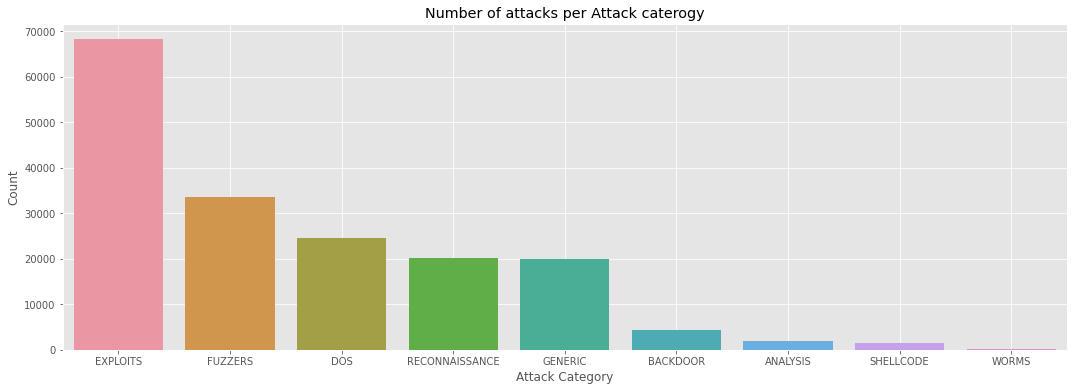

In [ ]:
# A seguir mostramos uma grafica de barras:

plt.figure(figsize=(18,6))
sns.barplot(x = newdf['Attack category'].value_counts().index, y=newdf['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')
plt.grid(True)

In [ ]:
# A seguir tamb√©m podemos ver a contagem de cada barra:

pd.DataFrame(newdf['Attack category'].value_counts())[:]

Attack category
EXPLOITS                  68211
FUZZERS                   33638
DOS                       24582
RECONNAISSANCE            20136
GENERIC                   19860
BACKDOOR                   4353
ANALYSIS                   1881
SHELLCODE                  1511
WORMS                       169

In [ ]:
# Podemos graficar, apenas, os 6 primeiros atributos da coluna "Attack category"

a=pd.DataFrame(newdf['Attack category'].value_counts())[:6]

In [ ]:
a

Attack category
EXPLOITS                  68211
FUZZERS                   33638
DOS                       24582
RECONNAISSANCE            20136
GENERIC                   19860
BACKDOOR                   4353

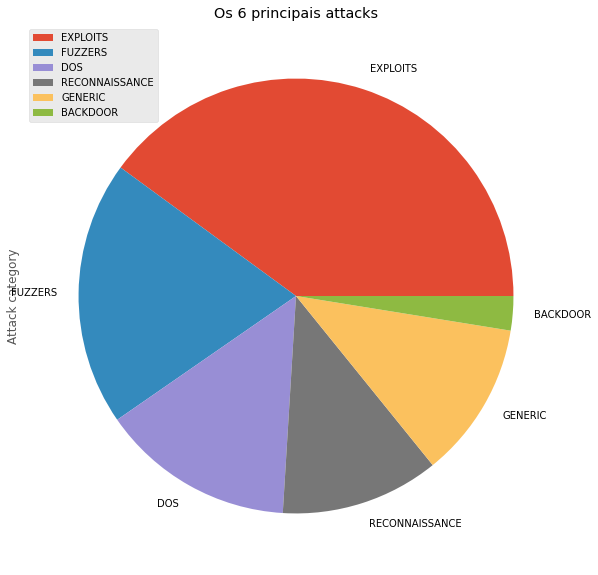

In [ ]:
# Vejamos esses atributos num gr√°fico de pizza:

a.plot(kind='pie', subplots=True, figsize=(10, 10))
plt.title('Os 6 principais attacks')
plt.legend(loc='upper left')
plt.show()

<font color="orange">Agora vamos analisar os Attacks com Date e Time</font>

In [ ]:
# Temos:

newdf['Start time']
# Na seguinte celula vamos converter esses Dados na forma padr√£o

0         1421927414
1         1421927415
2         1421927416
3         1421927417
4         1421927418
             ...    
174336    1424262066
174337    1424262067
174338    1424262067
174339    1424262068
174340    1424262068
Name: Start time, Length: 174341, dtype: object

In [ ]:
# Convertendo nossos Dados de Date e Time, assim:

newdf['Start time'] = pd.to_datetime(newdf['Start time'], unit='s')
newdf['Last time'] = pd.to_datetime(newdf['Last time'], unit='s')
newdf['Duration'] = ((newdf['Last time'] - newdf['Start time']).dt.seconds).astype(int)

In [ ]:
newdf[:10] # ou tamb√©m: newdf.head() ou newdf.sample()

Attack category   Attack subcategory  ... Destination Port Service Duration
0  RECONNAISSANCE                 HTTP  ...                     HTTP        2
1        EXPLOITS     Unix 'r' Service  ...                      NaN        0
2        EXPLOITS              Browser  ...                     HTTP        0
3        EXPLOITS  Miscellaneous Batch  ...           PERSONAL-AGENT        0
4        EXPLOITS           Cisco IOS   ...                     HTTP        0
5             DOS        Miscellaneous  ...                     HTTP        0
6             DOS        Miscellaneous  ...                     HTTP        3
7         GENERIC                 IXIA  ...            REMOTEWARE-CL        0
8        EXPLOITS              Browser  ...                     HTTP        0
9        EXPLOITS              Browser  ...                     HTTP        1

[10 rows x 14 columns]

In [ ]:
# Esta parte √© importante, porque temos apenas dois dias. Os dias s√£o os seguintes:

newdf['Start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

In [ ]:
newdf.describe()

Source Port  Destination Port           Port       Duration
count  174341.000000     174341.000000  169678.000000  174341.000000
mean    15391.130382       1304.599423     198.166592       2.341572
std     21707.824000       7466.035607     962.671658       9.309381
min         0.000000          0.000000       0.000000       0.000000
25%         0.000000          0.000000       0.000000       0.000000
50%         0.000000          0.000000       0.000000       0.000000
75%     31862.000000         80.000000      80.000000       1.000000
max     65535.000000      65535.000000   43189.000000      60.000000

A m√©dia e o percentil de $75\%$ s√£o muito diferentes para a Source Port e a Destination Port, √© muito diferente. No entanto, m√≠nimo e m√°ximo s√£o iguais. A√≠ vem o teste de hip√≥teses.



>> $H_0$: $Œº_1 = Œº_2$

>> $H_a$: $Œº_1 \neq Œº_2$

Podemos obter um de dois resultados do teste:

* Se o valor $p$ for menor que nosso n√≠vel de signific√¢ncia ($p < Œ±$), rejeitamos a hip√≥tese nula $H_0$ e afirmamos que a diferen√ßa observada √© <font color="yellow">estatisticamente significativa</font>.

* Se o valor $p$ for maior que nosso n√≠vel de signific√¢ncia ($p > Œ±$), teremos que reter $H_0$ e concluir que a diferen√ßa observada n√£o √© <font color="yellow">estatisticamente significativa</font>.


O teste de hip√≥tese √© conduzido usando uma estat√≠stica $T - test$ que especifica as duas S√©ries <font color="yellow">df_interest['Source Port']</font> e <font color="yellow">df_interest['Destination Port']</font>. Ao especificar essas duas s√©ries, estamos automaticamente nos referindo a um teste comparativo das m√©dias de ambas as s√©ries:

In [ ]:

statistic, pvalue = stats.ttest_ind(newdf['Source Port'], newdf['Destination Port'], equal_var=False)


In [ ]:
print("p-value in T-test:" + str(pvalue))

p-value in T-test:0.0


Como o valor $p$ √© muito pr√≥ximo de zero, o ``Python`` aproxima essa medida para $0.0$. Com isso em mente, podemos rejeitar a hip√≥tese nula $H_0$ quanto √† igualdade das m√©dias das portas de origem e de destino. Isso significa que a porta de origem dos ataques √© muito diferente da porta de destino. Desta forma, a maioria dos ataques s√£o direcionados a portas l√≥gicas espec√≠ficas, o que n√£o deixa um ponto aleat√≥rio.


Estaremos usando dois m√©todos de c√°lculo de correla√ß√£o: 

* <font color="orange">Correla√ß√£o de Pearson:</font> avalia as rela√ß√µes lineares entre duas vari√°veis. Se o valor for pr√≥ximo a $0$, h√° uma rela√ß√£o linear fraca ou inexistente entre as vari√°veis. [Ver aqui: Pearson](https://psicometriaonline.com.br/o-que-e-correlacao-de-pearson/). 

* <font color="orange">Correla√ß√£o de Spearman:</font> avalia as rela√ß√µes monot√¥nicas entre duas vari√°veis. Se o valor for pr√≥ximo a $0$, h√° uma rela√ß√£o monot√¥nica fraca ou inexistente entre as vari√°veis. [Ver aqui Spearman](https://psicometriaonline.com.br/o-que-e-correlacao-de-spearman/).

In [ ]:
# Correla√ß√£o de Pearson:

newdf.corr(method='pearson')

Source Port  Destination Port      Port  Duration
Source Port          1.000000          0.137155  0.175222 -0.078024
Destination Port     0.137155          1.000000  1.000000 -0.026770
Port                 0.175222          1.000000  1.000000 -0.022964
Duration            -0.078024         -0.026770 -0.022964  1.000000

In [ ]:
# Correla√ß√£o de Spearman:

newdf.corr(method='spearman')

Source Port  Destination Port      Port  Duration
Source Port          1.000000          0.885328  0.895108  0.361013
Destination Port     0.885328          1.000000  1.000000  0.346909
Port                 0.895108          1.000000  1.000000  0.348573
Duration             0.361013          0.346909  0.348573  1.000000

In [ ]:
df_dummies = pd.get_dummies(newdf, columns=['Attack category'])

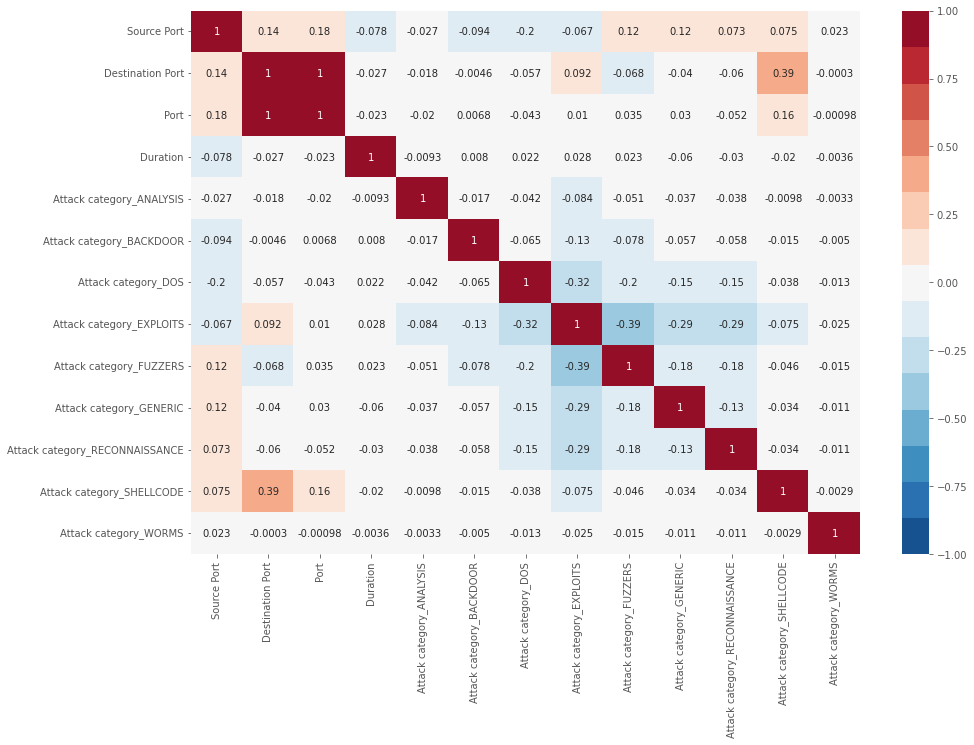

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummies.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

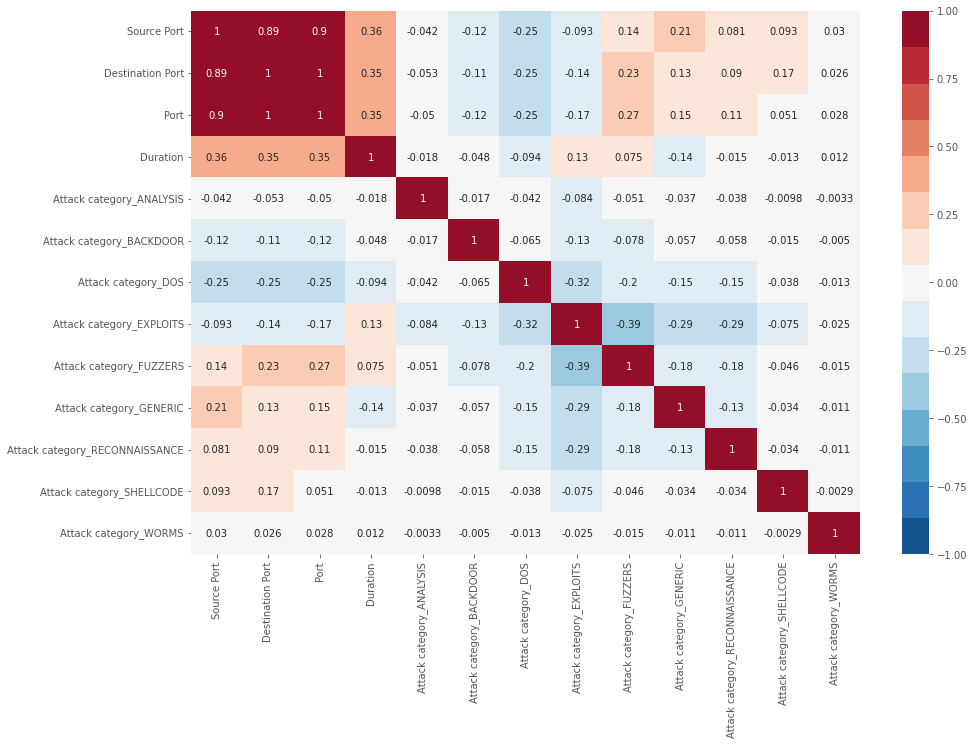

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummies.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

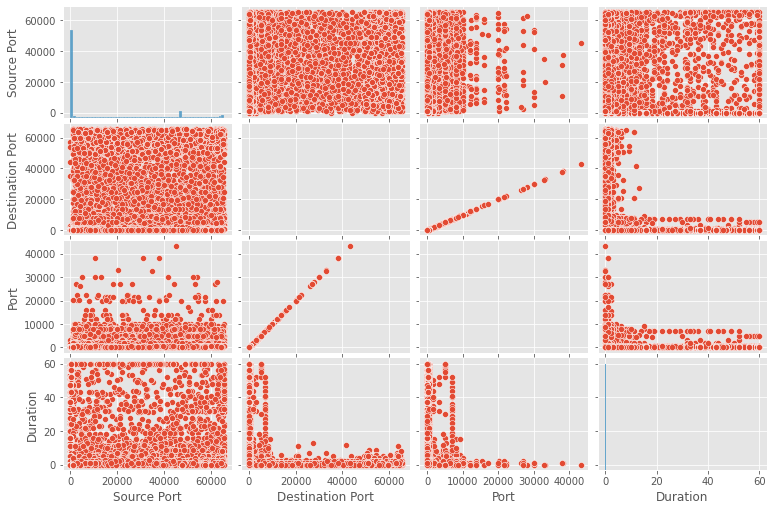

In [ ]:
g = sns.pairplot(newdf)
g.fig.set_size_inches(11,7)
plt.show()

In [ ]:
newdf['Destination IP'].value_counts()[:10]

149.171.126.17    43199
149.171.126.10    24002
149.171.126.19    21619
149.171.126.13    20464
149.171.126.18    13301
149.171.126.14    12195
149.171.126.12    11970
149.171.126.15    10555
149.171.126.11     9444
149.171.126.16     7592
Name: Destination IP, dtype: int64

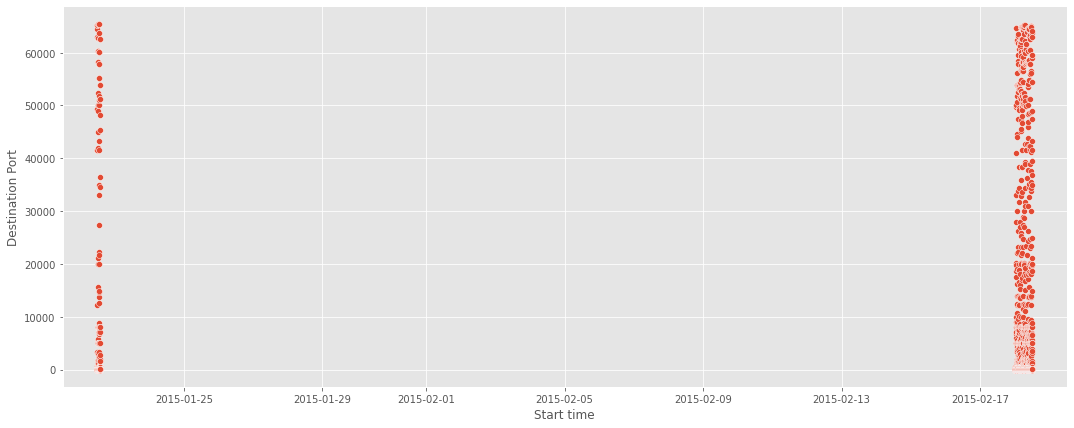

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start time'].min()-timedelta(days=1),right=newdf['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

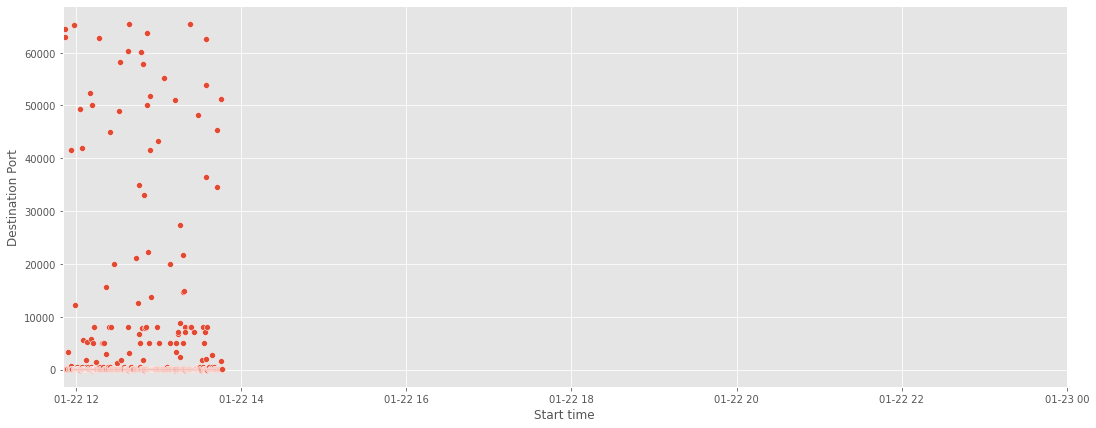

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))
plt.grid(True)
plt.show()

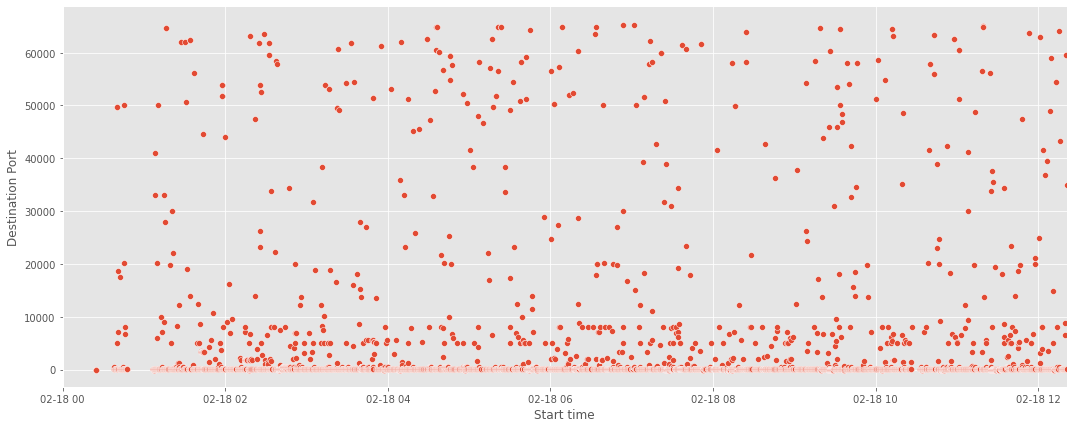

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=datetime.strptime('15-02-18', '%y-%m-%d'),right=newdf['Start time'].max())
plt.grid(True)
plt.show()

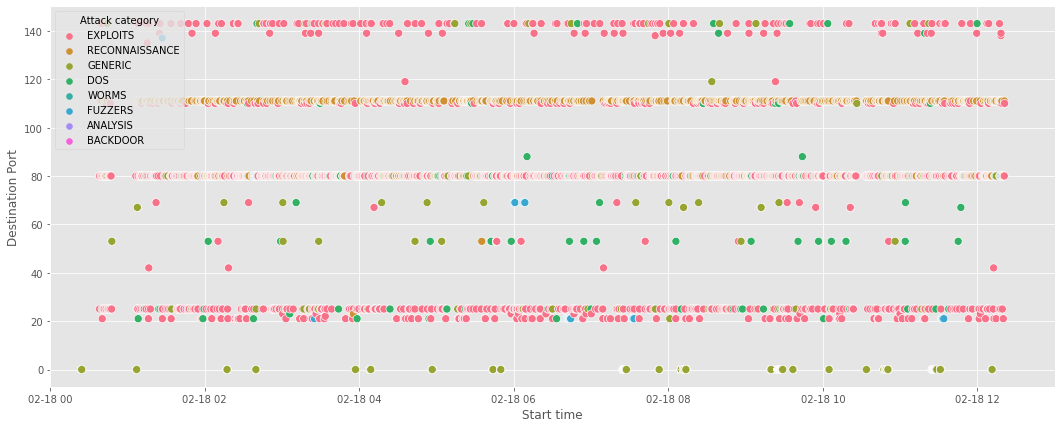

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', 
                data=newdf[(newdf['Destination IP']=='149.171.126.17')&(newdf['Destination Port']<=150)], 
                s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()

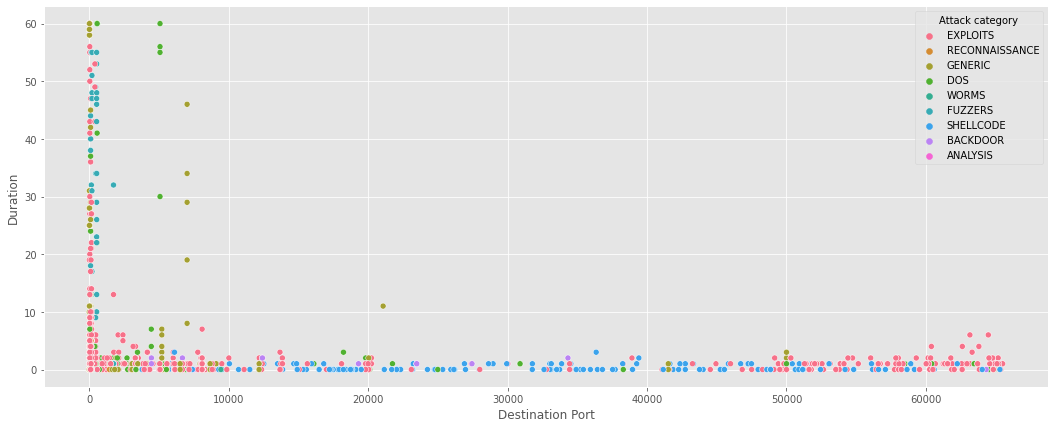

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='Duration', hue='Attack category', data=newdf[newdf['Destination IP']=='149.171.126.17'])
plt.grid(True)
plt.show()

In [ ]:
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(18,8))
    ax = sns.heatmap(df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [ ]:
newdf["Start time"][1].hour

11

In [ ]:
%%time
df_pivot = newdf.copy()
df_pivot['hour'] = df_pivot.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)

CPU times: user 3.22 s, sys: 12.3 ms, total: 3.24 s
Wall time: 3.23 s


In [ ]:
df_pivot[:5]

Attack category   Attack subcategory  ... Duration      hour
0  RECONNAISSANCE                 HTTP  ...        2  11:00:00
1        EXPLOITS     Unix 'r' Service  ...        0  11:00:00
2        EXPLOITS              Browser  ...        0  11:00:00
3        EXPLOITS  Miscellaneous Batch  ...        0  11:00:00
4        EXPLOITS           Cisco IOS   ...        0  11:00:00

[5 rows x 15 columns]

In [ ]:
df_p1 = pd.pivot_table(df_pivot,values='Attack Name', index=['hour'], columns=['Attack category'], aggfunc='count')
df_p1

Attack category  ANALYSIS  BACKDOOR   DOS  ...  RECONNAISSANCE  SHELLCODE  WORMS
hour                                       ...                                  
00:00:00                3        16   127  ...             177         20      3
01:00:00              186      1148  2640  ...            1804        105     14
02:00:00               71       100   630  ...            1023        113     10
03:00:00              226        60  3755  ...            2727        113     17
04:00:00               64        87   617  ...            1034        115     10
05:00:00              198       645  3038  ...            1750        111     15
06:00:00               84        90   637  ...            1010        116      9
07:00:00              179       578  3390  ...            1846        116     15
08:00:00               73       111   664  ...            1010        107     11
09:00:00              199       635  3545  ...            2110        116     15
10:00:00               79       121   643  ...             945        102      9
11:00:00              203       470  3890  ...            2696        135     18
12:00:00              257       266   778  ...            1282        154     17
13:00:00               59        26   228  ...             722         88      6

[14 rows x 9 columns]

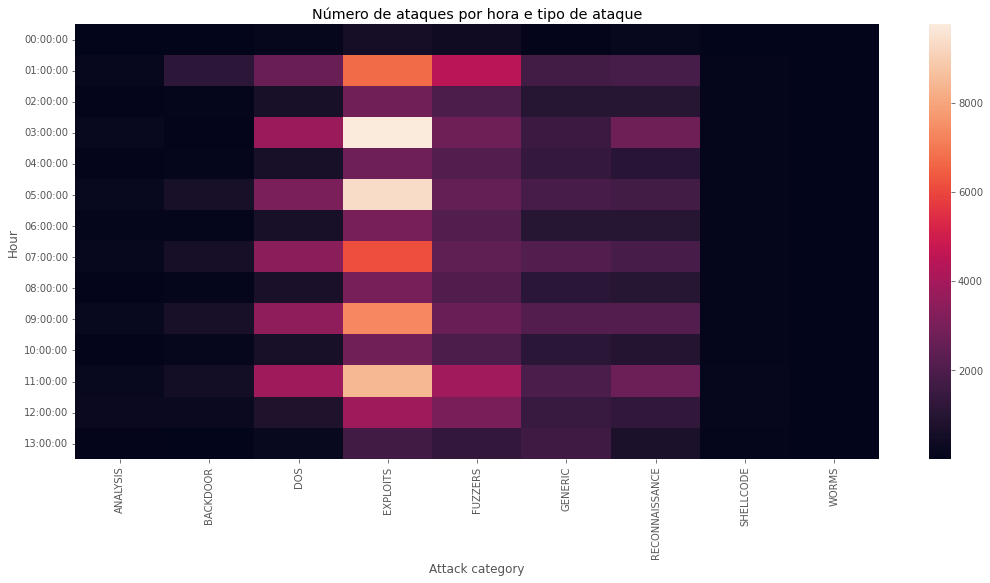

In [ ]:
heatmap_graph(df = df_p1, xlabel = 'Attack category', ylabel = 'Hour', title = 'N√∫mero de ataques por hora e tipo de ataque')


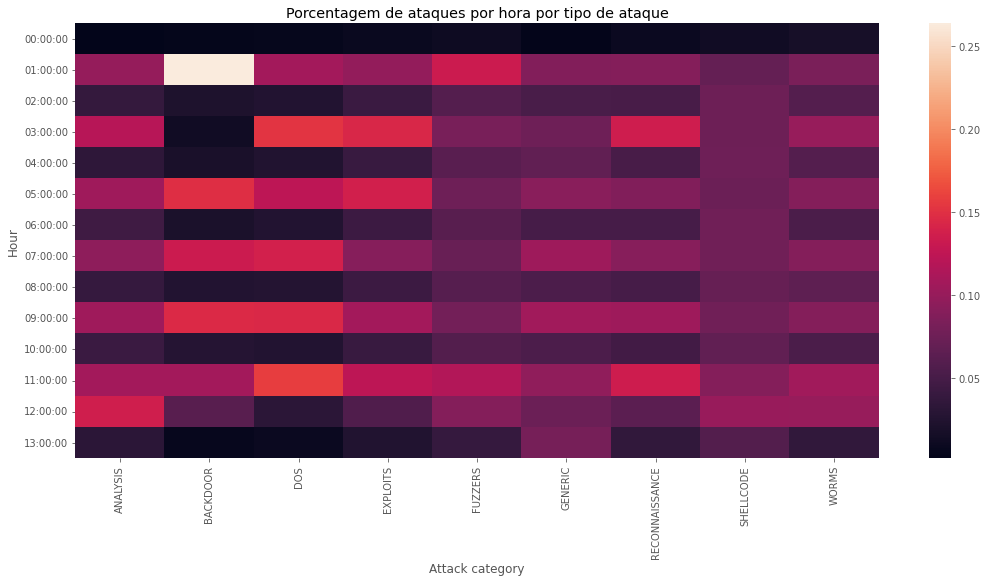

In [ ]:
heatmap_graph(df = df_p1/df_p1.sum(), xlabel = 'Attack category', ylabel = 'Hour', title = 'Porcentagem de ataques por hora por tipo de ataque')

<Figure size 1800x576 with 0 Axes>

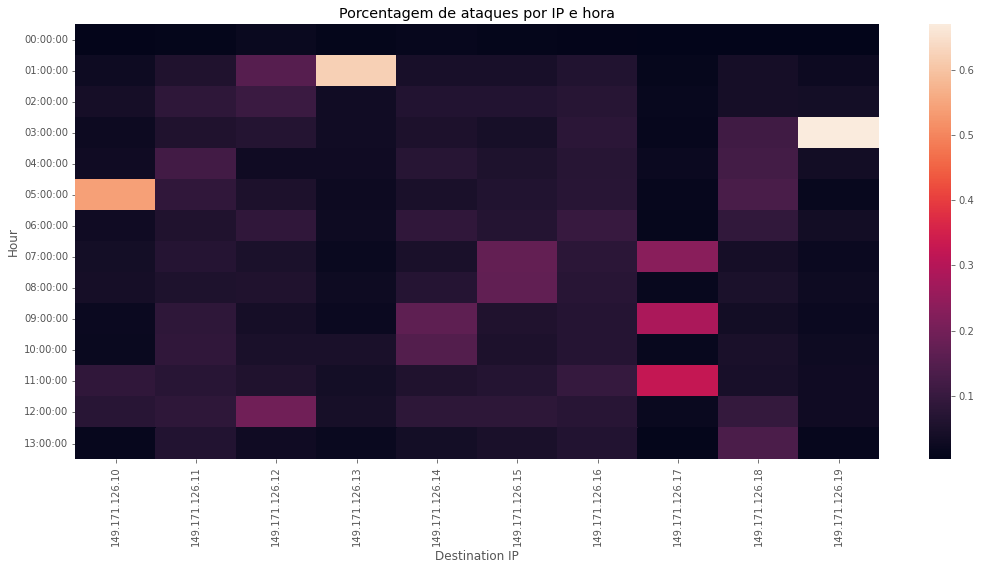

In [ ]:
plt.figure(figsize=(25, 8))
df_p2 = pd.pivot_table(df_pivot, values='Attack Name', index=['hour'], columns=['Destination IP'], aggfunc='count')
heatmap_graph(df = df_p2/df_p2.sum(), xlabel = 'Destination IP', ylabel = 'Hour', title = 'Porcentagem de ataques por IP e hora')


Embora existam mais de $170000$ registros relacionados a ataques de ``ciberseguran√ßa``, esses ataques visam $10$ servidores com <font color="orange">endere√ßos IPv4</font> no intervalo $[149.171.126.10,149.171.126.19]$. Isso significa que a empresa foi atacada em v√°rias ocasi√µes durante o per√≠odo observado, em uma sub-rede espec√≠fica, o que denota uma sucess√£o n√£o acidental e direcionada de eventos.

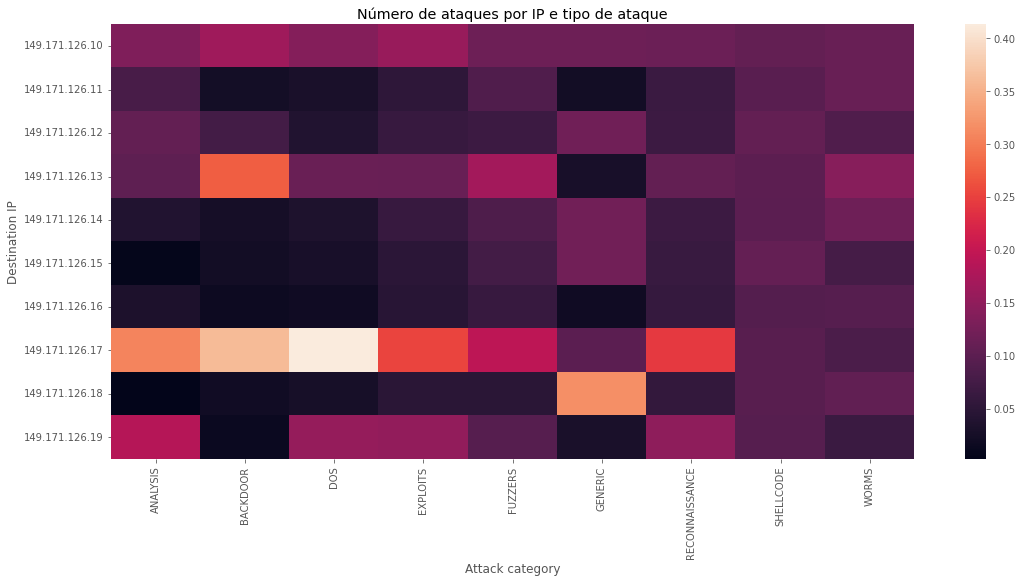

In [ ]:
df_p3 = pd.pivot_table(df_pivot, values='Attack Name', index=['Destination IP'], columns=['Attack category'], aggfunc='count')
heatmap_graph(df = df_p3/df_p3.sum(), xlabel = 'Attack category', ylabel = 'Destination IP', title = 'N√∫mero de ataques por IP e tipo de ataque')

A m√°quina mais atacada √© aquela com o endere√ßo <font color="yellow">IPv4 149.171.126.17</font>. Por outro lado, enquanto ``WORMS``, ``SHELLCODE`` e ataques ``GENERIC`` n√£o s√£o direcionados a m√°quinas espec√≠ficas, Nega√ß√£o de Servi√ßos (Denial of Services), ``EXPLOITS`` e ``BACKDOOR`` s√£o claramente direcionados a servidores espec√≠ficos.


\\
Vamos agora olhar para esta mesma rela√ß√£o por categoria de ataque (Attack Category) realizando um ``T-test`` de pares:

In [ ]:
for attack in list(newdf['Attack category'].unique()):
    df_attack = newdf[newdf['Attack category'] == attack].copy()
    statistic, pvalue = stats.ttest_ind(df_attack['Source Port'], df_attack['Destination Port'], equal_var=False)
    print('p-value in T-test for ' + attack + ' attack: ' + str(pvalue))


p-value in T-test for RECONNAISSANCE attack: 0.0
p-value in T-test for EXPLOITS attack: 0.0
p-value in T-test for DOS attack: 0.0
p-value in T-test for GENERIC attack: 0.0
p-value in T-test for SHELLCODE attack: 0.3205085348227197
p-value in T-test for FUZZERS attack: 0.0
p-value in T-test for WORMS attack: 4.246722648635902e-46
p-value in T-test for BACKDOOR attack: 4.8983630604388355e-17
p-value in T-test for ANALYSIS attack: 9.319524862935004e-87


Como pode ser visto, os ``ùëù-values`` de todas as categorias de ataque, exceto uma, s√£o muito pr√≥ximos de $0.0$. Isso significa que os ataques foram direcionados √†s portas espec√≠ficas, exceto os ataques ``SHELLCODE``, cuja hip√≥tese nula n√£o pode ser rejeitada. Para este tipo de ataque existe uma aleatoriedade definida, o que significa que as portas de origem e destino possuem m√©dias semelhantes.

\\
Para verificar esta afirma√ß√£o, faremos uso de uma tabela de conting√™ncia que permite relacionar a contagem de um determinado par de vari√°veis, semelhante a como vimos o ``.pivot_table()``

In [ ]:
df_crosstab = pd.crosstab(newdf['Attack category'], newdf['Destination Port'])
df_crosstab

Destination Port  0      10     21     22     ...  65502  65511  65517  65535
Attack category                               ...                            
ANALYSIS           1442      0      0      0  ...      0      0      0      0
BACKDOOR           4000      0      7      0  ...      0      0      0      0
DOS               20825      4     75      0  ...      0      0      0      0
EXPLOITS          40143      0   2198     14  ...      2      2      2      0
FUZZERS           13355      0    758      0  ...      0      0      0      0
GENERIC            2612      0     26      6  ...      0      0      0      6
RECONNAISSANCE     8324      0      0      0  ...      0      0      0      0
SHELLCODE             0      0      0      0  ...      0      0      0      0
WORMS                 0      0      0      0  ...      0      0      0      0

[9 rows x 3182 columns]

Tabela de conting√™ncia do tipo de ``Attack type`` versus ``Target port`` e as contagens individuais n√£o s√£o uniformes. Isso permite afirmar nossa infer√™ncia de que pode haver uma intera√ß√£o entre essas duas vari√°veis. Podemos testar formalmente se as varia√ß√µes que observamos refletem diferen√ßas reais ou s√£o apenas um subproduto da aleatoriedade. Existem muitas maneiras diferentes de testar, mas vamos nos concentrar no teste mais amplamente utilizado: o <font color="yellow">Chi-square test</font>. A hip√≥tese nula para o teste **Chi-square** √© a seguinte:



\\
$H_0$ : O ``Attack category`` √© independente da porta de destino


\\
Intuitivamente, "_independence between two variables_" significa que a distribui√ß√£o dos valores de uma vari√°vel permanece a mesma, mesmo quando o valor da segunda vari√°vel muda (e vice-versa). No nosso caso, isso significa que as propor√ß√µes das diferentes categorias de ataque permanecem as mesmas, mesmo quando olhamos para diferentes portas de destino. Os dados parecem indicar o contr√°rio, ent√£o vamos discutir como resumir numericamente os dados para examinar formalmente a hip√≥tese nula:



In [ ]:
chi2, p_value, dof, expected = chi2_contingency(df_crosstab)
print("p-value of Chi-square test for Attack category vs. Destination Port =", p_value)

p-value of Chi-square test for Attack category vs. Destination Port = 0.0


O ``ùëù-value`` √© extremamente pequeno e, portanto, rejeitamos a hip√≥tese nula e conclu√≠mos que ``Attack category`` e ``Destination port`` n√£o s√£o independentes. Em outras palavras, a porta de destino n√£o permanece a mesma para diferentes categorias de ataque, o que est√° de acordo com o que observamos anteriormente. Para visualizar essa rela√ß√£o entre essas vari√°veis (``source port``, ``destination port`` e ``attack category`` ), podemos inicialmente fazer um gr√°fico de dispers√£o usando a fun√ß√£o ``.scatterplot()`` entre as portas de origem e destino em termos da categoria de ataque:

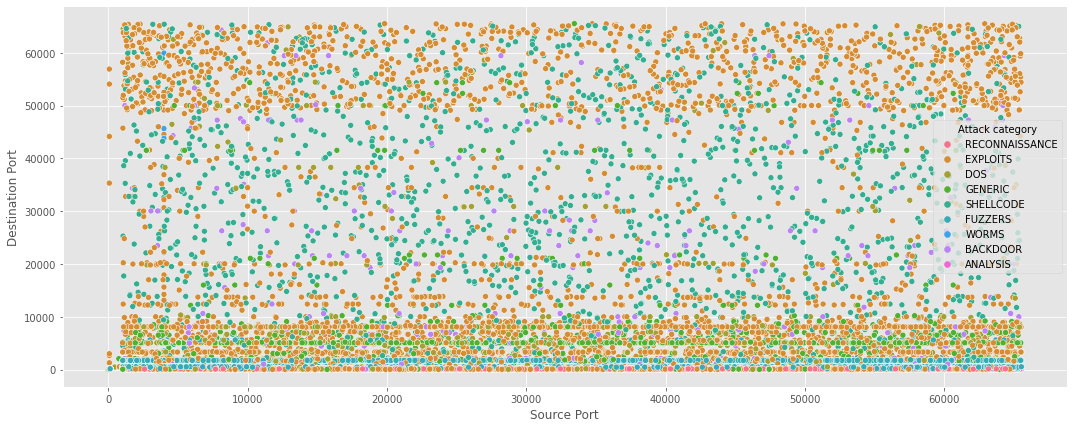

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Source Port',y='Destination Port', hue='Attack category',data=newdf)
plt.show()

Um certo padr√£o pode ser observado no gr√°fico, em que os ataques geralmente ocorrem em portas menores que $10000$ ou maiores que $50000$, exceto para ataques do tipo ``shellcode``, como hav√≠amos antecipado no teste de hip√≥teses.

Para ver essa rela√ß√£o com mais profundidade, podemos visualizar a distribui√ß√£o das portas l√≥gicas de origem e destino com um diagrama de tiras (strip diagram) usando a fun√ß√£o ``.stripplot()``:

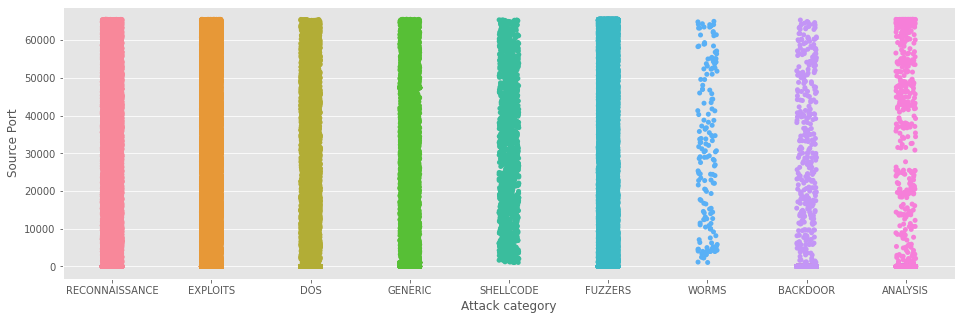

In [ ]:
# Source ports (Portas de origem)

plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Source Port',data=newdf)
plt.show()

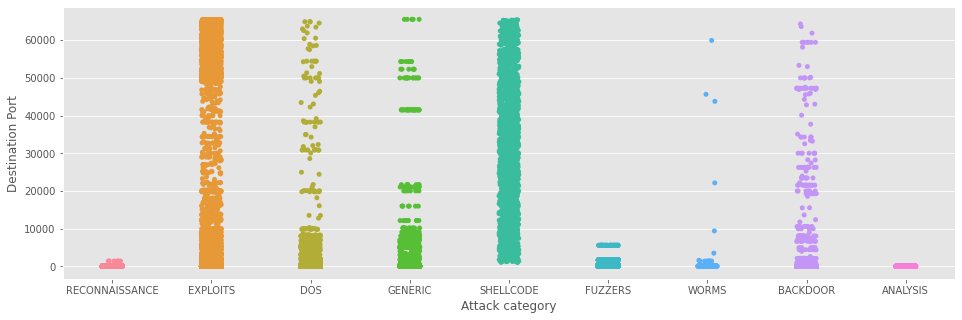

In [ ]:
# Destination ports (Portas de destino)

plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Destination Port',data=newdf)
plt.show()

In [ ]:
list(newdf['Source IP'].unique())

['175.45.176.0', '175.45.176.3', '175.45.176.2', '175.45.176.1']

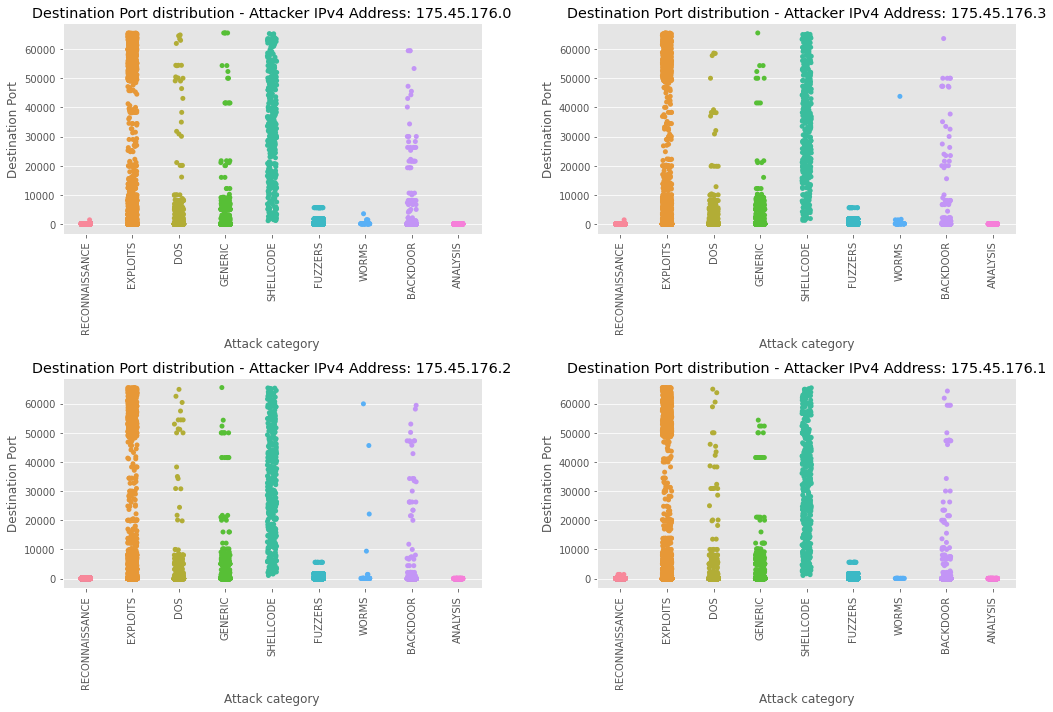

In [ ]:
ips = list(newdf['Source IP'].unique())
f, axes = plt.subplots(2, 2)
f.set_figheight(10)
f.set_figwidth(15)

labels = list(newdf['Attack category'].unique())
for i, ip in enumerate(ips):
    sns.stripplot(x='Attack category',y='Destination Port',data=newdf[newdf['Source IP'] == ip], order=labels, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_xlabel('Attack category')
    axes[int(i/2)][i%2].set_ylabel('Destination Port')
    axes[int(i/2)][i%2].set_title('Destination Port distribution - Attacker IPv4 Address: ' + ip)
    axes[int(i/2)][i%2].set_xticklabels(labels,rotation=90)
plt.tight_layout()
plt.show()

Vista da distribui√ß√£o das portas de destino por categoria de ataque e IP de destino (view of the distribution of destination ports by attack category and destination IP):

In [ ]:
list(newdf['Destination IP'].unique())

['149.171.126.16',
 '149.171.126.18',
 '149.171.126.10',
 '149.171.126.15',
 '149.171.126.14',
 '149.171.126.12',
 '149.171.126.13',
 '149.171.126.11',
 '149.171.126.17',
 '149.171.126.19']

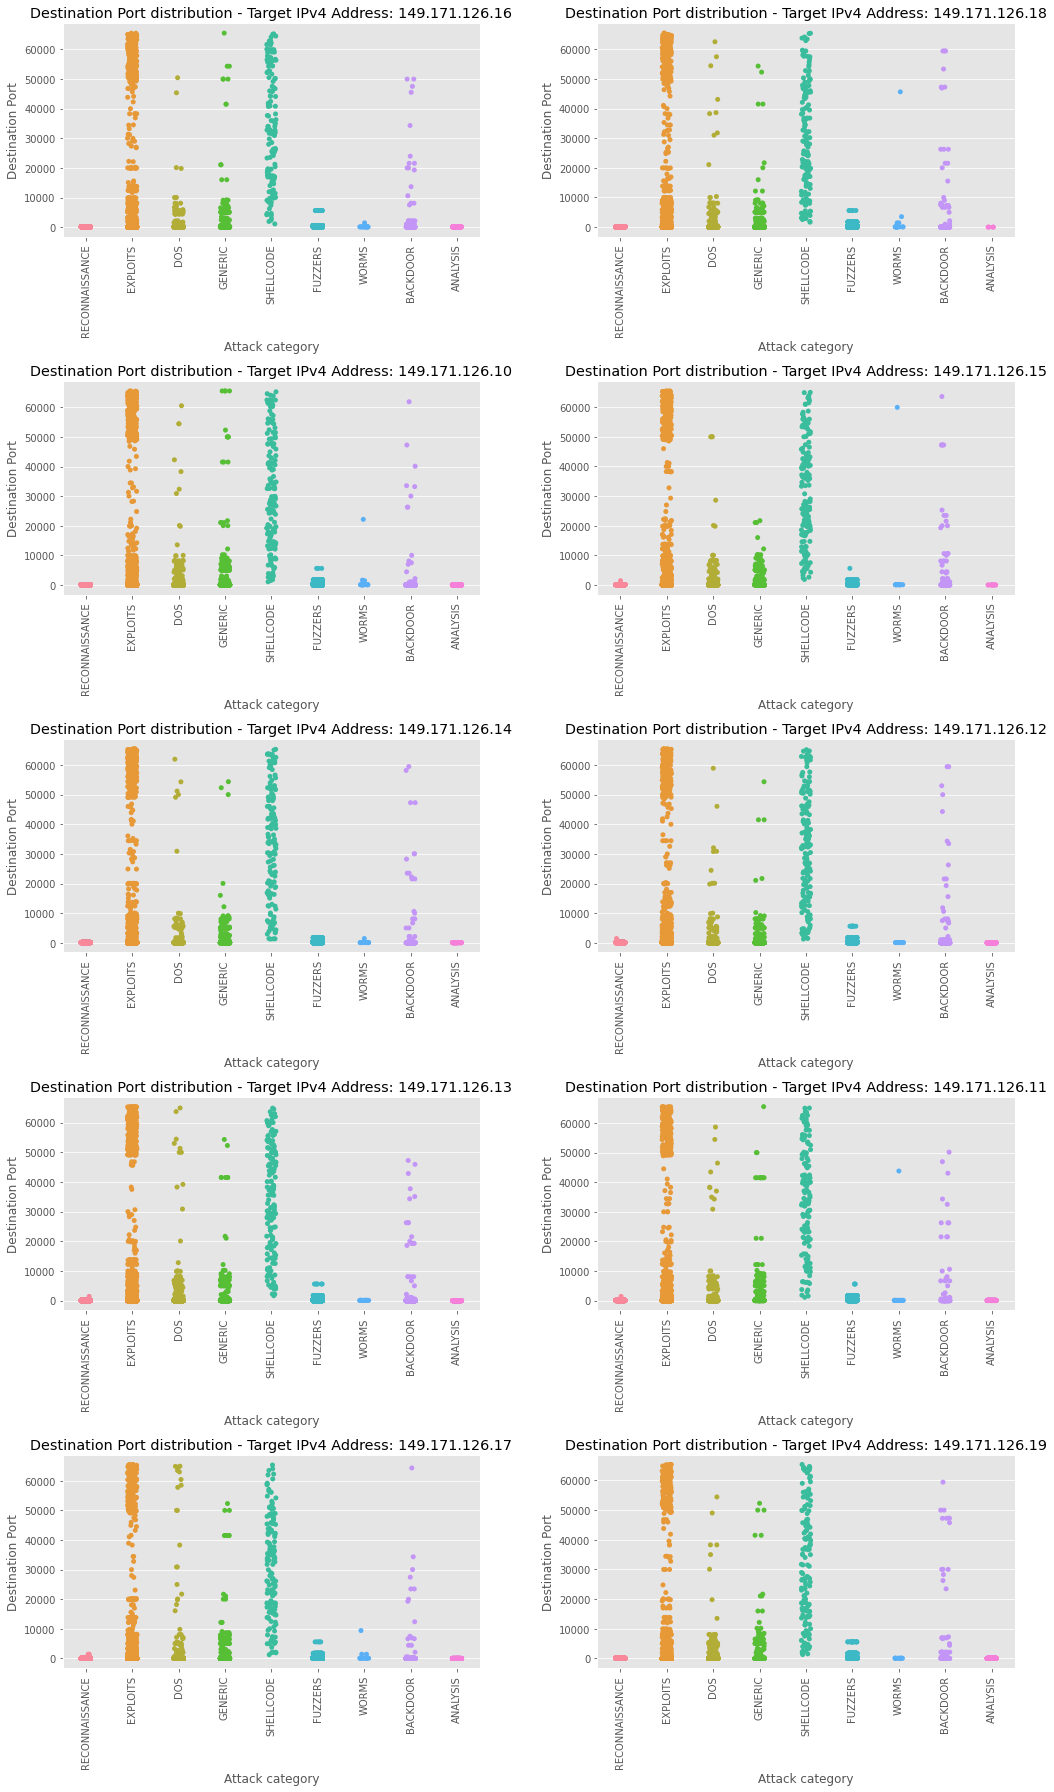

In [ ]:
ips = list(newdf['Destination IP'].unique())
f, axes = plt.subplots(5, 2)
f.set_figheight(25)
f.set_figwidth(15)

labels = list(newdf['Attack category'].unique())

for i, ip in enumerate(ips):
    sns.stripplot(x='Attack category',y='Destination Port',data=newdf[newdf['Destination IP'] == ip], order=labels, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_xlabel('Attack category')
    axes[int(i/2)][i%2].set_ylabel('Destination Port')
    axes[int(i/2)][i%2].set_title('Destination Port distribution - Target IPv4 Address: ' + ip)
    axes[int(i/2)][i%2].set_xticklabels(labels,rotation=90)
plt.tight_layout()
plt.show()

Esses gr√°ficos nos mostram que h√° uma diferencia√ß√£o na forma como os ataques est√£o realizando suas tarefas. H√° uma particulariza√ß√£o pelos alvos, algo que n√£o acontece com os dispositivos de origem.